In [182]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math

In [183]:
data=pd.read_csv('D:\parnal\Datasets\LS_2.0.csv')
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [184]:
data.columns=data.columns.str.strip().str.lower().str.replace('\n','_')
data.columns

Index(['state', 'constituency', 'name', 'winner', 'party', 'symbol', 'gender',
       'criminal_cases', 'age', 'category', 'education', 'assets',
       'liabilities', 'general_votes', 'postal_votes', 'total_votes',
       'over total electors _in constituency',
       'over total votes polled _in constituency', 'total electors'],
      dtype='object')

In [185]:
data.isnull().sum()

state                                         0
constituency                                  0
name                                          0
winner                                        0
party                                         0
symbol                                      245
gender                                      245
criminal_cases                              245
age                                         245
category                                    245
education                                   245
assets                                      245
liabilities                                 245
general_votes                                 0
postal_votes                                  0
total_votes                                   0
over total electors _in constituency          0
over total votes polled _in constituency      0
total electors                                0
dtype: int64

In [186]:
data.shape

(2263, 19)

In [187]:
data['age'].describe()

count    2018.000000
mean       52.273538
std        11.869373
min        25.000000
25%        43.250000
50%        52.000000
75%        61.000000
max        86.000000
Name: age, dtype: float64

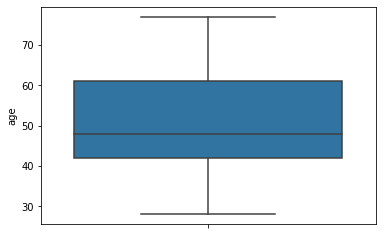

In [188]:
sns.boxplot(data=data['age'], y=data['age'])

In [189]:
data[data['education']=='Post Graduate\n']

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over total electors _in constituency,over total votes polled _in constituency,total electors
1880,Bihar,SASARAM (SC),CHHEDI PASWAN,1,BJP,Lotus,MALE,4,63.0,SC,Post Graduate\n,"Rs 3,21,52,250\n~3 Crore+","Rs 22,14,842\n~22 Lacs+",492364,2436,494800,27.675266,50.718703,1787878


In [190]:
data['education'].unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [191]:
data[data['education']=='Post Graduate\n']=data[data['education']=='Post Graduate']

In [192]:
data[data['education']=='Post Graduate']

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over total electors _in constituency,over total votes polled _in constituency,total electors
1,Telangana,ADILABAD,Godam Nagesh,0.0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665.0,149.0,318814.0,21.399929,29.964370,1489790.0
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0.0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199.0,1130.0,435329.0,22.466390,37.999125,1937690.0
6,Uttar Pradesh,AGRA,Preeta Harit,0.0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",Rs 0\n ~,44877.0,272.0,45149.0,2.330042,3.940979,1937690.0
12,Gujarat,AHMEDABAD WEST,DR. KIRIT P. SOLANKI,1.0,BJP,Lotus,MALE,0,69.0,SC,Post Graduate,"Rs 8,94,74,039\n ~ 8 Crore+",Rs 0\n ~,638241.0,3381.0,641622.0,39.044323,64.211450,1643317.0
18,Rajasthan,AJMER,Durga Lal Regar,0.0,BSP,Elephant,MALE,0,60.0,SC,Post Graduate,"Rs 4,17,40,458\n ~ 4 Crore+","Rs 8,90,000\n ~ 8 Lacs+",13547.0,71.0,13618.0,0.725772,1.078016,1876346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,Kerala,WAYANAD,P.P. Suneer,0.0,CPI(M),Ears of Corn And Sickle,MALE,0,50.0,GENERAL,Post Graduate,"Rs 1,38,15,960\n ~ 1 Crore+",Rs 0\n ~,273971.0,626.0,274597.0,20.195723,25.128780,1359679.0
2250,NCT OF Delhi,WEST DELHI,PARVESH SAHIB SINGH VERMA,1.0,BJP,Lotus,MALE,0,41.0,GENERAL,Post Graduate,"Rs 15,51,95,014\n ~ 15 Crore+","Rs 4,00,97,329\n ~ 4 Crore+",862058.0,3590.0,865648.0,36.499913,60.010593,2371644.0
2256,Maharashtra,YAVATMAL-WASHIM,Parashram Bhaosing Ade,0.0,IND,Tractor Chalata Kisan,MALE,0,64.0,GENERAL,Post Graduate,"Rs 18,73,01,769\n ~ 18 Crore+","Rs 4,17,919\n ~ 4 Lacs+",24447.0,52.0,24499.0,1.278530,2.085334,1916185.0
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0.0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661.0,25.0,14686.0,0.766419,1.250060,1916185.0


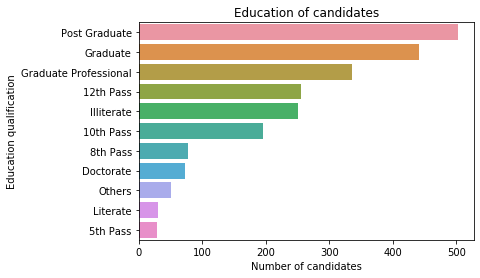

In [193]:
data['education'].fillna('Illiterate',inplace=True)
data[data['education']=='Not Available']=data[data['education']=='Illiterate']
education=data.groupby('education',as_index=False)['name'].count()
education=education.sort_values(by='name',ascending=False)
sns.barplot(y=education['education'],x=education['name'])
plt.xlabel('Number of candidates')
plt.ylabel('Education qualification')
plt.title('Education of candidates')
plt.show()


In [194]:
data['education'].value_counts().sum()

2241

In [195]:
education

,education,name
10,Post Graduate,502
5,Graduate,441
6,Graduate Professional,336
1,12th Pass,256
7,Illiterate,250
0,10th Pass,196
3,8th Pass,78
4,Doctorate,73
9,Others,50
8,Literate,30


In [196]:
education['per education']=education['name']/education['name'].sum()
education

,education,name,per education
10,Post Graduate,502,0.224107
5,Graduate,441,0.196875
6,Graduate Professional,336,0.150000
1,12th Pass,256,0.114286
7,Illiterate,250,0.111607
0,10th Pass,196,0.087500
3,8th Pass,78,0.034821
4,Doctorate,73,0.032589
9,Others,50,0.022321
8,Literate,30,0.013393


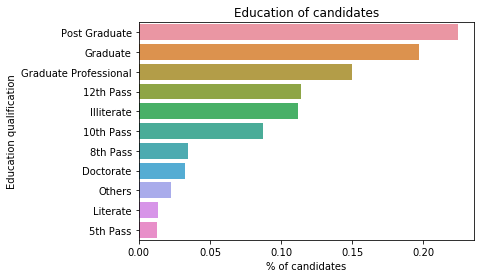

In [197]:
sns.barplot(y=education['education'],x=education['per education'])
plt.xlabel('% of candidates')
plt.ylabel('Education qualification')
plt.title('Education of candidates')
plt.show()


In [198]:
won_mps=data[data['winner']==1]
won_mps['criminal_cases']=won_mps['criminal_cases'].astype(int)
won_mps[won_mps['criminal_cases']==won_mps['criminal_cases'].max()]

C:\Users\Parnal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over total electors _in constituency,over total votes polled _in constituency,total electors
903,Kerala,IDUKKI,Adv. DEAN KURIAKOSE,1.0,INC,Hand,MALE,204,37.0,GENERAL,Post Graduate,"Rs 1,33,95,011\n ~ 1 Crore+","Rs 1,00,00,000\n ~ 1 Crore+",497697.0,796.0,498493.0,41.396506,54.210007,1204191.0


In [199]:
crim_mps=won_mps[won_mps['criminal_cases']>=1]
top_crims=crim_mps.sort_values(['criminal_cases'],ascending=False)[:15]
top_crims

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over total electors _in constituency,over total votes polled _in constituency,total electors
903,Kerala,IDUKKI,Adv. DEAN KURIAKOSE,1.0,INC,Hand,MALE,204,37.0,GENERAL,Post Graduate,"Rs 1,33,95,011\n ~ 1 Crore+","Rs 1,00,00,000\n ~ 1 Crore+",497697.0,796.0,498493.0,41.396506,54.210007,1204191.0
0,Telangana,ADILABAD,SOYAM BAPU RAO,1.0,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892.0,482.0,377374.0,25.330684,35.468248,1489790.0
1361,Telangana,MALKAJGIRI,ANUMULA REVANTH REDDY,1.0,INC,Hand,MALE,42,51.0,GENERAL,Graduate,"Rs 24,53,57,182\n ~ 24 Crore+","Rs 2,78,07,304\n ~ 2 Crore+",602907.0,841.0,603748.0,19.164699,38.611553,3150313.0
321,West Bengal,BARRACKPORE,ARJUN SINGH,1.0,BJP,Lotus,MALE,24,57.0,GENERAL,10th Pass,"Rs 80,55,691\n ~ 80 Lacs+","Rs 11,00,000\n ~ 11 Lacs+",471490.0,1504.0,472994.0,32.928418,42.816550,1436431.0
2259,Telangana,ZAHIRABAD,B.B.PATIL,1.0,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066.0,178.0,434244.0,28.975369,41.574183,1498666.0
409,Telangana,BHONGIR,Komati Reddy Venkat Reddy,1.0,INC,Hand,MALE,14,55.0,GENERAL,12th Pass,"Rs 16,25,43,845\n ~ 16 Crore+","Rs 2,40,69,129\n ~ 2 Crore+",532031.0,764.0,532795.0,32.726302,43.931819,1628033.0
882,West Bengal,HOOGHLY,LOCKET CHATTERJEE,1.0,BJP,Lotus,FEMALE,14,45.0,GENERAL,Graduate,"Rs 3,56,55,698\n ~ 3 Crore+",Rs 0\n ~,670031.0,1417.0,671448.0,38.007903,46.032658,1766601.0
1415,West Bengal,MEDINIPUR,Dilip Ghosh,1.0,BJP,Lotus,MALE,14,54.0,GENERAL,10th Pass,"Rs 45,36,462\n ~ 45 Lacs+",Rs 0\n ~,683285.0,2148.0,685433.0,40.940047,48.601205,1674236.0
785,Uttar Pradesh,GHOSI,ATUL KUMAR SINGH,1.0,BSP,Elephant,MALE,13,36.0,GENERAL,Graduate,"Rs 6,65,36,025\n ~ 6 Crore+","Rs 34,54,591\n ~ 34 Lacs+",572459.0,1370.0,573829.0,28.811725,50.270614,1991651.0
562,West Bengal,COOCH BEHAR,NISITH PRAMANIK,1.0,BJP,Lotus,MALE,11,33.0,SC,8th Pass,"Rs 96,29,810\n ~ 96 Lacs+",Rs 0\n ~,728634.0,2960.0,731594.0,40.325984,47.959351,1814200.0


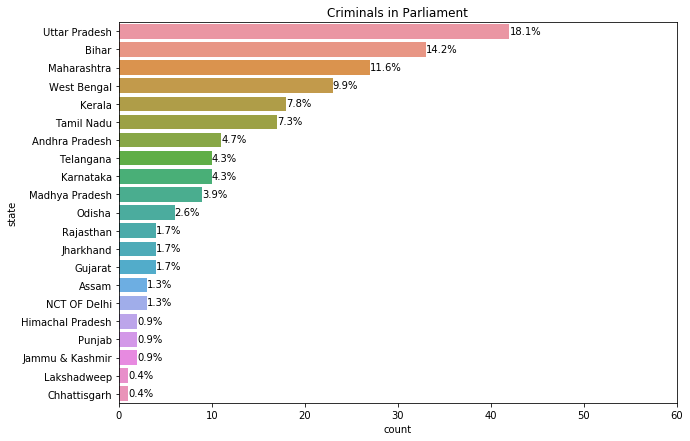

In [200]:
plt.figure(figsize=(10,7))
ax=sns.countplot(y='state',data=crim_mps,order=crim_mps['state'].value_counts().index)
ax.set(xlim=(0,60))
total=crim_mps['state'].value_counts().sum()
plt.title('Criminals in Parliament')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/1.5
    ax.annotate(percentage, (x, y))

In [201]:
crim_elect_per=pd.DataFrame((crim_mps['state'].value_counts()/won_mps['state'].value_counts()).sort_values(ascending=False))
crim_elect_per

,state
Lakshadweep,1.000000
Kerala,0.900000
Bihar,0.825000
Telangana,0.588235
Maharashtra,0.574468
West Bengal,0.547619
Uttar Pradesh,0.538462
Himachal Pradesh,0.500000
Tamil Nadu,0.447368
Andhra Pradesh,0.440000


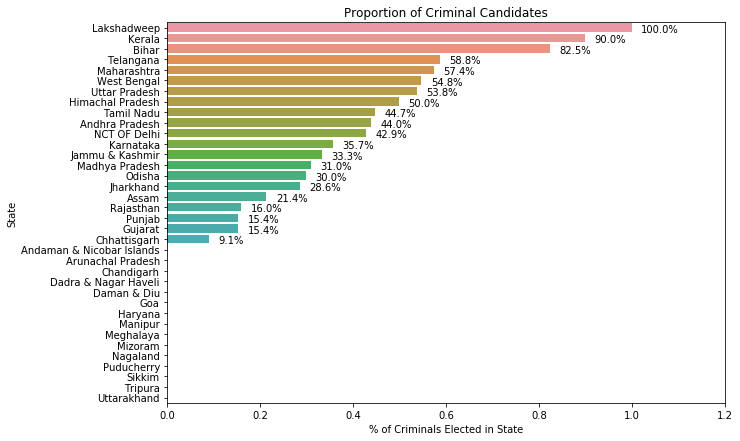

In [202]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='state',y=crim_elect_per.index,data=crim_elect_per,order=crim_elect_per.index)
ax.set(xlim=(0,1.2))
plt.xlabel('% of Criminals Elected in State')
plt.ylabel('State')
plt.title('Proportion of Criminal Candidates')
total=1
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/1
    ax.annotate(percentage, (x, y))

In [203]:
won_mps['state'].value_counts()

Uttar Pradesh                78
Maharashtra                  47
West Bengal                  42
Bihar                        40
Tamil Nadu                   38
Madhya Pradesh               29
Karnataka                    28
Gujarat                      26
Andhra Pradesh               25
Rajasthan                    25
Odisha                       20
Kerala                       20
Telangana                    17
Assam                        14
Jharkhand                    14
Punjab                       13
Chhattisgarh                 11
Haryana                      10
NCT OF Delhi                  7
Jammu & Kashmir               6
Uttarakhand                   5
Himachal Pradesh              4
Goa                           2
Arunachal Pradesh             2
Tripura                       2
Meghalaya                     2
Manipur                       2
Puducherry                    1
Lakshadweep                   1
Sikkim                        1
Andaman & Nicobar Islands     1
Chandiga

In [204]:
crim_elect_per['state'].sum()

9.149146231592471

In [205]:
won_mps.sort_values(by='over total votes polled _in constituency',ascending=False).head(100)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over total electors _in constituency,over total votes polled _in constituency,total electors
2033,Gujarat,SURAT,Darshana Vikram Jardosh,1.0,BJP,Lotus,FEMALE,0,58.0,GENERAL,Graduate,"Rs 2,38,72,876\n ~ 2 Crore+",Rs 0\n ~,794133.0,1518.0,795651.0,48.055148,74.411856,1655704.0
1566,Gujarat,NAVSARI,C. R. Patil,1.0,BJP,Lotus,MALE,1,64.0,GENERAL,10th Pass,"Rs 44,60,44,269\n ~ 44 Crore+","Rs 5,68,46,658\n ~ 5 Crore+",969430.0,3309.0,972739.0,49.336092,74.298217,1971658.0
2181,Gujarat,VADODARA,RANJANBEN BHATT,1.0,BJP,Lotus,FEMALE,0,56.0,GENERAL,12th Pass,"Rs 2,94,26,428\n ~ 2 Crore+",Rs 0\n ~,880905.0,2814.0,883719.0,49.235109,72.216434,1794896.0
1068,Himachal Pradesh,KANGRA,Kishan Kapoor,1.0,BJP,Lotus,MALE,2,67.0,ST,12th Pass,"Rs 8,58,41,247\n ~ 8 Crore+","Rs 36,05,161\n ~ 36 Lacs+",712133.0,13085.0,725218.0,50.809129,71.835341,1427338.0
392,Rajasthan,BHILWARA,SUBHASH CHANDRA BAHERIA,1.0,BJP,Lotus,MALE,0,62.0,GENERAL,Graduate,"Rs 23,27,03,276\n ~ 23 Crore+","Rs 18,27,380\n ~ 18 Lacs+",936065.0,2095.0,938160.0,46.970753,71.560040,1997328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,Rajasthan,UDAIPUR,ARJUNLAL MEENA,1.0,BJP,Lotus,MALE,0,54.0,ST,Post Graduate,"Rs 4,81,96,946\n ~ 4 Crore+","Rs 1,56,02,872\n ~ 1 Crore+",867694.0,3854.0,871548.0,42.112740,59.883044,2069559.0
1806,Maharashtra,RAVER,Khadse Raksha Nikhil,1.0,BJP,Lotus,FEMALE,0,31.0,GENERAL,Graduate,"Rs 17,27,13,734\n ~ 17 Crore+",Rs 0\n ~,652212.0,3174.0,655386.0,36.922094,59.770125,1775051.0
1076,Tamil Nadu,KANNIYAKUMARI,Vasanthakumar. H,1.0,INC,Hand,MALE,0,68.0,GENERAL,Post Graduate,"Rs 4,17,49,30,444\n ~ 417 Crore+","Rs 1,54,75,11,439\n ~ 154 Crore+",624627.0,2608.0,627235.0,41.780849,59.769284,1501250.0
430,Rajasthan,BIKANER (SC),ARJUN RAM MEGHWAL,1.0,BJP,Lotus,MALE,0,65.0,SC,Post Graduate,"Rs 2,35,24,459\n ~ 2 Crore+","Rs 10,60,314\n ~ 10 Lacs+",655427.0,2316.0,657743.0,35.522416,59.767651,1851628.0


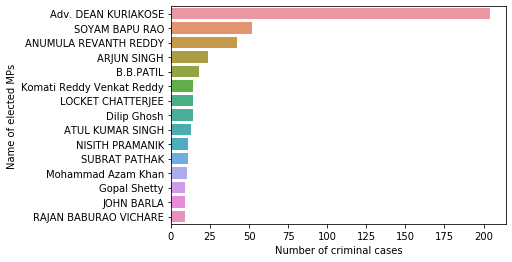

In [206]:
sns.barplot(y=top_crims['name'],x=top_crims['criminal_cases'])
plt.xlabel('Number of criminal cases')
plt.ylabel('Name of elected MPs')
plt.show()

In [207]:
won_mps_maha=won_mps[won_mps['state']=='Maharashtra']
won_mps_maha.sort_values(by='over total votes polled _in constituency',ascending=False)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over total electors _in constituency,over total votes polled _in constituency,total electors
1445,Maharashtra,MUMBAI NORTH,Gopal Shetty,1.0,BJP,Lotus,MALE,9,65.0,GENERAL,5th Pass,"Rs 15,75,35,232\n ~ 15 Crore+","Rs 2,11,36,135\n ~ 2 Crore+",705555.0,1123.0,706678.0,42.897866,71.384356,1647350.0
948,Maharashtra,JALGAON,Unmesh Bhaiyyasaheb Patil,1.0,BJP,Lotus,MALE,1,40.0,GENERAL,Graduate Professional,"Rs 1,23,24,604\n ~ 1 Crore+","Rs 25,29,954\n ~ 25 Lacs+",709510.0,4364.0,713874.0,36.961479,65.355900,1931400.0
2056,Maharashtra,THANE,RAJAN BABURAO VICHARE,1.0,SHS,Bow and Arrow,MALE,9,57.0,GENERAL,12th Pass,"Rs 18,14,41,465\n ~ 18 Crore+","Rs 5,40,80,733\n ~ 5 Crore+",738618.0,2351.0,740969.0,31.252607,63.278222,2370903.0
1054,Maharashtra,KALYAN,Dr. SHRIKANT EKNATH SHINDE,1.0,SHS,Bow and Arrow,MALE,1,32.0,GENERAL,Post Graduate,"Rs 1,96,16,515\n ~ 1 Crore+","Rs 12,41,233\n ~ 12 Lacs+",558023.0,1700.0,559723.0,28.474835,62.841364,1965676.0
1698,Maharashtra,PUNE,Girish Bhalchandra Bapat,1.0,BJP,Lotus,MALE,1,68.0,GENERAL,Graduate,"Rs 5,79,59,302\n ~ 5 Crore+","Rs 17,93,891\n ~ 17 Lacs+",631875.0,960.0,632835.0,30.485966,61.104867,2075824.0
1457,Maharashtra,MUMBAI NORTH WEST,Gajanan Kirtikar,1.0,SHS,Bow and Arrow,MALE,0,75.0,GENERAL,Graduate,"Rs 10,53,92,000\n ~ 10 Crore+","Rs 40,32,000\n ~ 40 Lacs+",569018.0,1045.0,570063.0,32.908571,60.527101,1732263.0
1806,Maharashtra,RAVER,Khadse Raksha Nikhil,1.0,BJP,Lotus,FEMALE,0,31.0,GENERAL,Graduate,"Rs 17,27,13,734\n ~ 17 Crore+",Rs 0\n ~,652212.0,3174.0,655386.0,36.922094,59.770125,1775051.0
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1.0,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+","Rs 26,23,964\n ~ 26 Lacs+",696961.0,7699.0,704660.0,37.856533,58.425159,1861396.0
1453,Maharashtra,MUMBAI NORTH EAST,Manoj Kotak,1.0,BJP,Lotus,MALE,2,46.0,GENERAL,10th Pass,"Rs 5,46,61,944\n ~ 5 Crore+","Rs 20,48,000\n ~ 20 Lacs+",513579.0,1020.0,514599.0,32.391343,56.600281,1588693.0
642,Maharashtra,DHULE,Bhamre Subhash Ramrao,1.0,BJP,Lotus,MALE,2,66.0,GENERAL,Post Graduate,"Rs 15,86,51,112\n ~ 15 Crore+","Rs 10,00,000\n ~ 10 Lacs+",610268.0,3265.0,613533.0,32.152902,56.360959,1908173.0


In [208]:
a=won_mps_maha.sort_values(by='over total votes polled _in constituency',ascending=False)[:10]
a['party'].value_counts(normalize=True)

BJP    0.7
SHS    0.3
Name: party, dtype: float64

In [209]:
b=won_mps.sort_values(by='over total votes polled _in constituency',ascending=False)[:50]
b['party'].value_counts(normalize=True)

BJP      0.90
INC      0.04
YSRCP    0.02
SHS      0.02
DMK      0.02
Name: party, dtype: float64

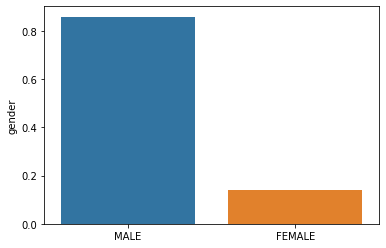

In [210]:
won_mps_women=pd.DataFrame(won_mps['gender'].value_counts(normalize=True))
sns.barplot(x=won_mps_women.index,y='gender',data=won_mps_women)

Text(0.5, 1.0, '% of votes required to win')

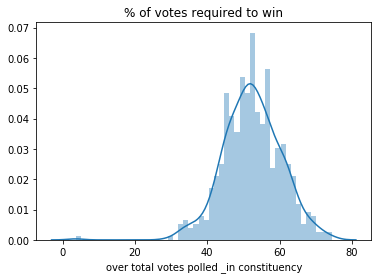

In [211]:
#40% of total votes is enough to win from a constituency
sns.distplot(won_mps['over total votes polled _in constituency'],bins=50)
plt.title('% of votes required to win')

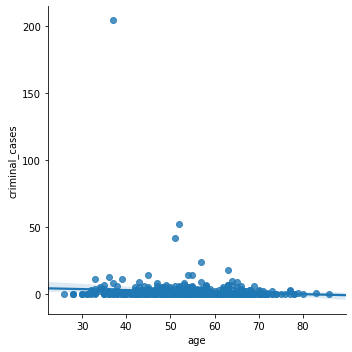

In [212]:
#No Correlation between age and criminal cases
sns.lmplot(x='age',y='criminal_cases',data=won_mps)

C:\Users\Parnal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, '% of MPs with criminal cases against them')

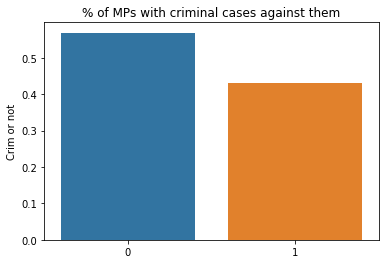

In [213]:
#~40% of MPs elected in Parliament have a criminal case against them
won_mps['Crim or not'] = [1 if x >=1 else 0 for x in won_mps['criminal_cases']] 
a=pd.DataFrame(won_mps['Crim or not'].value_counts(normalize=True))
sns.barplot(x=a.index,y='Crim or not',data=a)
plt.title('% of MPs with criminal cases against them')

Text(0.5, 1.0, 'Gender seggregation among MPs with criminal cases against them')

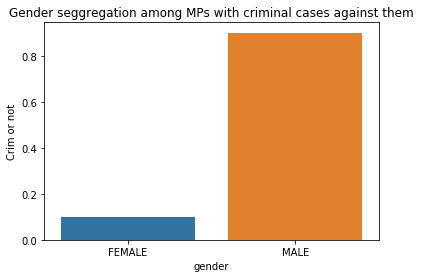

In [214]:
#Among elected MPs with criminal cases against them,~90% are male 
won_mps_sum_gender_based=won_mps.groupby('gender').sum().apply(lambda x: x/x.sum())
sns.barplot(x=won_mps_sum_gender_based.index,y='Crim or not',data=won_mps_sum_gender_based)
plt.title('Gender seggregation among MPs with criminal cases against them')

Text(0.5, 1.0, 'Gender seggregation among MPs with criminal cases against them')

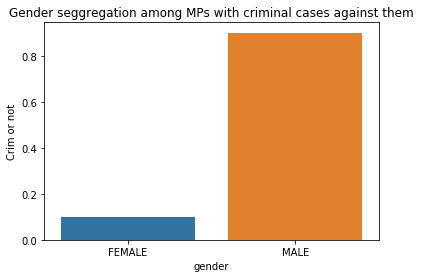

In [215]:
#Among elected MPs with criminal cases against them,~90% are male 
won_mps_sum_gender_based=won_mps.groupby('gender').sum().apply(lambda x: x/x.sum())
sns.barplot(x=won_mps_sum_gender_based.index,y='Crim or not',data=won_mps_sum_gender_based)
plt.title('Gender seggregation among MPs with criminal cases against them')

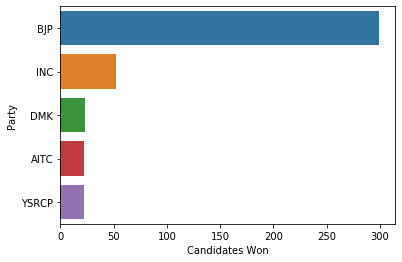

In [216]:
party_wise_win=won_mps.groupby('party',as_index=False)['name'].count().sort_values('name',ascending=False)[:5]
sns.barplot(x=party_wise_win['name'],y=party_wise_win['party'])
plt.xlabel('Candidates Won')
plt.ylabel('Party')
plt.show()

C:\Users\Parnal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


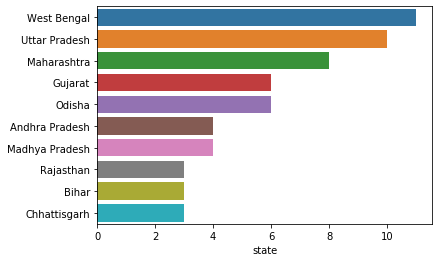

In [217]:
#Top 10 states with highest number of female MPs
won_mps['Male or not'] = [0 if x=='MALE' else 1 for x in won_mps['gender']] 
won_mps_female=won_mps[won_mps['Male or not']==1]
pd.DataFrame(won_mps_female['state'].value_counts())[:10]
sns.barplot(x='state',y=pd.DataFrame(won_mps_female['state'].value_counts())[:10].index,data=pd.DataFrame(won_mps_female['state'].value_counts())[:10])

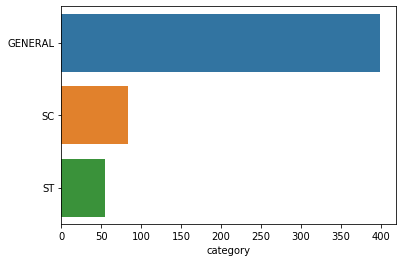

In [218]:
f=pd.DataFrame(won_mps['category'].value_counts())
sns.barplot(y=f.index,x='category',data=f)


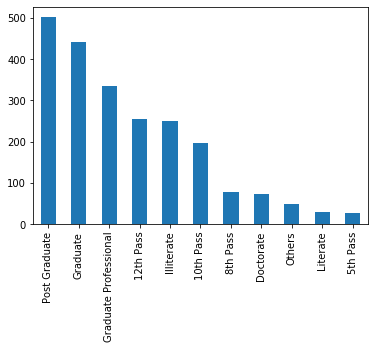

In [223]:
data['education'].value_counts().plot.bar()

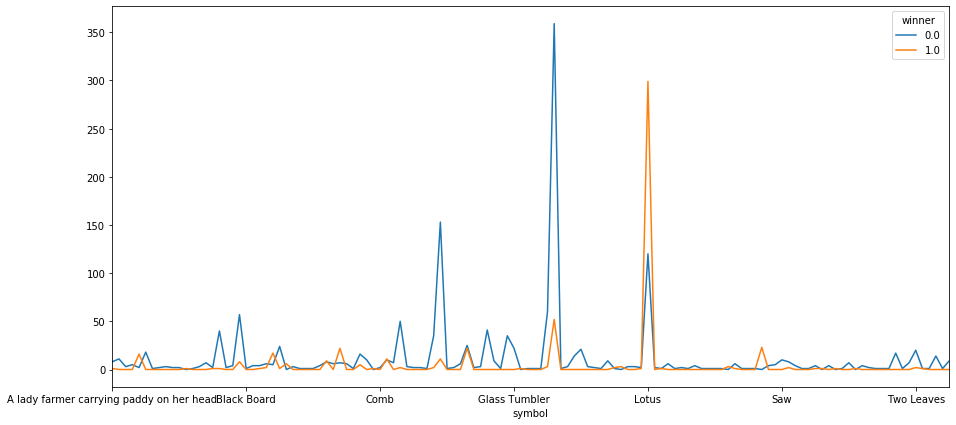

In [229]:
pd.crosstab(data['symbol'],data['winner']).plot(figsize=(15,7))

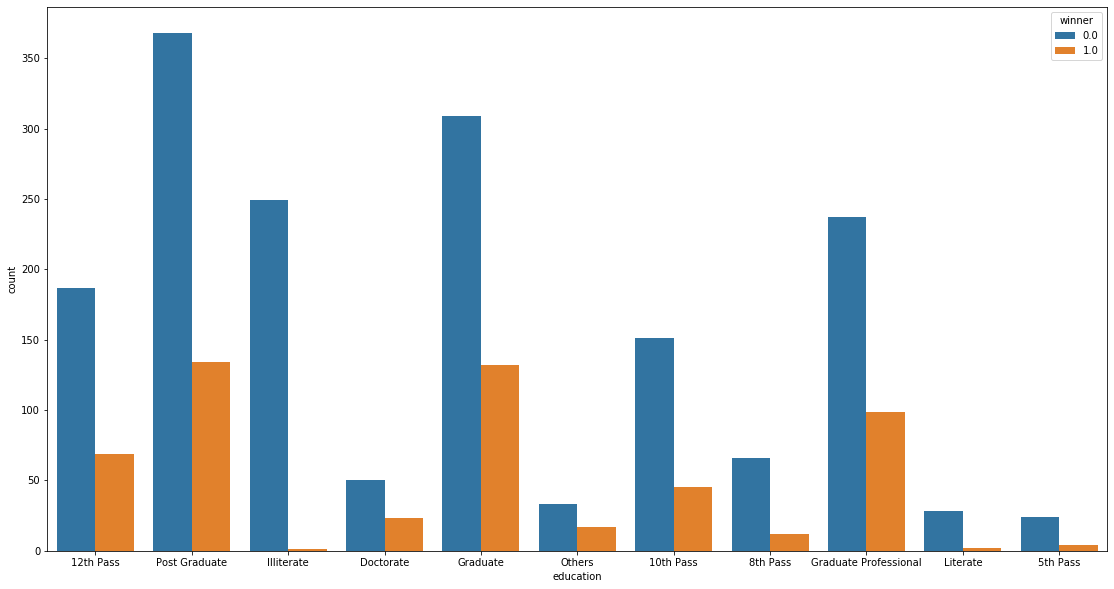

In [234]:
plt.figure(figsize=(19,10))
sns.countplot(data['education'],hue=data['winner'])